### Case Study 3 : Textual analysis of movie reviews

** Due Date: April 6, 2016 5:59PM**

*------------

<img src="http://www.conversational-technologies.com/nldemos/nlWordle.GIF">

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    Helen Hong
    Haley Huang
    Tom Meagher
    Tyler Reese

**Desired outcome of the case study.**
* In this case study we will look at movie reviews from the v2.0 polarity dataset comes from
the http://www.cs.cornell.edu/people/pabo/movie-review-data.
    * It contains written reviews of movies divided into positive and negative reviews.
* As in Case Study 2 idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* This case study will be based upon the scikit-learn Python library
* We will build upon the turtorial "Working With Text Data" which can be found at http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

**Case study assumptions:**
* You have access to a python installation

**Required Python libraries:**
* Numpy (www.numpy.org) (should already be installed from Case Study 2)
* Matplotlib (matplotlib.org) (should already be installed from Case Study 2)
* Scikit-learn (scikit-learn.org) (avaiable from Enthought Canopy)
* You are also welcome to use the Python Natural Language Processing Toolkit (www.nltk.org) (though it is not required).

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

## Problem 1 (20 points): Complete Exercise 2: Sentiment Analysis on movie reviews from http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

* Assuming that you have downloaded the scikit-learn source code:
    * The data cane be downloaded using doc/tutorial/text_analytics/data/movie_reviews/fetch_data.py
    * A skeleton for the solution can be found in doc/tutorial/text_analytics/skeletons/exercise_02_sentiment.py
    * A completed solution can be found in doc/tutorial/text_analytics/solutions/exercise_02_sentiment.py
* **It is ok to use the solution provided in the scikit-learn distribution as a starting place for your work.**

### Modify the solution to Exercise 2 so that it can run in this iPython notebook
* This will likely involved moving around data files and/or small modifications to the script.

In [7]:
import numpy as np
import pandas as pa
import matplotlib.pylab as py
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

Load data

In [20]:
from sklearn.datasets import load_files
dataset = load_files(container_path='text_analytics/txt_sentoken')

Split the dataset in training (75%) and testing (25%) sets

In [19]:
from sklearn.cross_validation import train_test_split
docs_train, docs_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.25, random_state=None)

Build pipeline

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB())])

Setting user defined parameters for grid search, exploring different parameter setting

In [17]:
parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (5000, 10000, 30000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'tfidf__use_idf': (True, False),
    #'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': (1e-3,0.00001),
   # 'clf__fit_prior': (True, False) 
}

Fitting Naive Bayes with Grid Search(CV=5), showing running time, best parameter and confusion matrix

In [15]:
from sklearn.grid_search import GridSearchCV
from time import time
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1,cv =5)
t0 = time()
gs_clf = gs_clf.fit(docs_train, y_train)    
print("done in %0.3fs" % (time() - t0))
print

done in 1140.933s



In [16]:
print("Best score: %0.3f" % gs_clf.best_score_)
print("Best parameters set:")
best_parameters = gs_clf.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 0.821
Best parameters set:
	clf__alpha: 0.001
	tfidf__use_idf: False
	vect__max_df: 0.75
	vect__max_features: 5000
	vect__ngram_range: (1, 2)


In [21]:
predicted = gs_clf.predict(docs_test)
np.mean(predicted == y_test)

0.89800000000000002

             precision    recall  f1-score   support

          0       0.88      0.91      0.90       246
          1       0.91      0.88      0.90       254

avg / total       0.90      0.90      0.90       500

Precision matrix
[[225  21]
 [ 30 224]]


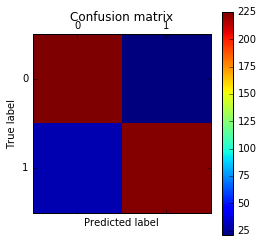

In [22]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))
con1=metrics.confusion_matrix(y_test, predicted)
print 'Precision matrix'
print con1
plt.matshow(con1)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Fitting Linear Support vector machine with Grid Search(CV=5), showing running time, best parameter and confusion matrix

In [ ]:
from sklearn.linear_model import SGDClassifier
text_clf2 = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter=5, shuffle= True, random_state=42))])

In [ ]:
parameters2 = {
    'vect__max_df': (0.5, 0.75, 1.0),
    #'vect__max_features': (5000, 10000, 30000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    #'tfidf__use_idf': (True, False),
    #'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': (1e-3,0.00001, 0.000001),
    #'clf__n_iter': (10, 50, 80) 
}

In [ ]:
gs_clf2 = GridSearchCV(text_clf2, parameters2, n_jobs=-1)
t0 = time()
gs_clf2 = gs_clf2.fit(docs_train, y_train)    
print("done in %0.3fs" % (time() - t0))
print()

In [ ]:
print("Best score: %0.3f" % gs_clf2.best_score_)
print("Best parameters set:")
best_parameters2 = gs_clf2.best_estimator_.get_params()
for param_name in sorted(parameters2.keys()):
    print("\t%s: %r" % (param_name, best_parameters2[param_name]))

In [ ]:
predicted2 = gs_clf2.predict(docs_test)
np.mean(predicted2 == y_test)

In [ ]:
print(metrics.classification_report(y_test, predicted2))
con2=metrics.confusion_matrix(y_test, predicted2)
print 'Precision matrix'
print con2
plt.matshow(con2)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Fitting Logistic regression with Grid Search(CV=5), showing running time, best parameter and confusion matrix

In [ ]:
from sklearn.linear_model import SGDClassifier
text_clf3 = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(loss='log', penalty='l2',alpha=1e-3, n_iter=5, shuffle= True, random_state=42))])

In [ ]:
gs_clf3 = GridSearchCV(text_clf3, parameters2, n_jobs=-1,cv=5)
t0 = time()
gs_clf3 = gs_clf3.fit(docs_train, y_train)    
print("done in %0.3fs" % (time() - t0))
print()

In [ ]:
print("Best score: %0.3f" % gs_clf2.best_score_)
print("Best parameters set:")
best_parameters2 = gs_clf3.best_estimator_.get_params()
for param_name in sorted(parameters2.keys()):
    print("\t%s: %r" % (param_name, best_parameters2[param_name]))

In [ ]:
predicted3 = gs_clf3.predict(docs_test)
np.mean(predicted3 == y_test)

In [ ]:
print(metrics.classification_report(y_test, predicted3))
con3=metrics.confusion_matrix(y_test, predicted3)
print 'Precision matrix'
print con3
plt.matshow(con3)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Problem 2 (20 points): Explore the scikit-learn TfidVectorizer class

**Read the documentation for the TfidVectorizer class at http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html.** 
* Define the term frequency–inverse document frequency (TF-IDF) statistic (http://en.wikipedia.org/wiki/Tf%E2%80%93idf will likely help).
* Run the TfidVectorizer class on the training data above (docs_train).
* Explore the min_df and max_df parameters of TfidVectorizer.  What do they mean? How do they change the features you get?
* Explore the ngram_range parameter of TfidVectorizer.  What does it mean? How does it change the features you get? (Note, large values  of ngram_range may take a long time to run!)

Parameters in tf-idf Vectorizer:
min_df : filter all terms with frequency lower than this value. 
max-df : filter all terms with frequecy greater than this value, used to filter out stop words.
n-gram range: How many n-gram words are to be considered

In [ ]:
tfidfv = TfidfVectorizer()
tfidfv = tfidfv.set_params(max_df=0.75, max_features= 5000, use_idf= True, smooth_idf=True, sublinear_tf = True)

Running the tf-idf vectorizer object on training set

In [ ]:
t0 = time()
vectors = tfidfv.fit_transform(docs_train) 
print("done in %0.3fs" % (time() - t0))
print

In [ ]:
text_clf4 = MultinomialNB().fit(vectors, y_train)
text_clf4.score(vectors,y_train)

In [ ]:
count_test= tfidfv.transform(docs_test)
predicted4 = text_clf4.predict(count_test)
np.mean(predicted4 == y_test)

*------------------------

## Problem 3 (20 points): Machine learning algorithms


* Based upon Problem 2 pick some parameters for TfidfVectorizer
    * "fit" your TfidfVectorizer using docs_train
    * Compute "Xtrain", a Tf-idf-weighted document-term matrix using the transform function on docs_train
    * Compute "Xtest", a Tf-idf-weighted document-term matrix using the transform function on docs_test
    * Note, be sure to use the same Tf-idf-weighted class (**"fit" using docs_train**) to transform **both** docs_test and docs_train
* Examine two classifiers provided by scikit-learn 
    * LinearSVC
    * KNeighborsClassifier
    * Try a number of different parameter settings for each and judge your performance using a confusion matrix (see Problem 1 for an example).
* Does one classifier, or one set of parameters work better?
    * Why do you think it might be working better?
* For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
    * Can you conjecture on why the classifier made a mistake for this prediction?

Already triedl NB, SVM and logistic regression on Problem1. Here are going to try KNN,PCA 

K-Neareast Neighbour Using the Grid Search

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
tfidf_knn = TfidfVectorizer()
tfidf_knn.set_params(analyzer="word", max_df=0.75, ngram_range=(1, 2), use_idf=True, min_df=0.01, binary=False)
knn = KNeighborsClassifier(weights="distance", metric="euclidean")
pip_knn = Pipeline([("tfidf", tfidf_knn), ("lalg", knn)])
parameters3 = [ {
                    "tfidf__norm":[None, "l2"],
                    "lalg__n_neighbors": range(3, 13),
                    } ]
GridSearch_knn = GridSearchCV(pip_knn, parameters3,
                               n_jobs=-1, verbose=1, cv=5)            
GridSearch_knn.fit(docs_train, y_train)

In [ ]:
print GridSearch_knn.best_estimator_

In [ ]:
print "Mean accuracy on validation set = %f" % GridSearch_knn.best_score_

In [ ]:
print GridSearch_knn.best_params_

In [ ]:
predicted5 = GridSearch_knn.predict(docs_test)
np.mean(predicted5 == y_test)

In [ ]:
con5= metrics.confusion_matrix(predicted5, y_test)
print(metrics.classification_report(y_test, predicted5))
print np.mean(predicted5== y_test)
print 'Precision matrix'
print con5
plt.matshow(con5)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Try PCA ( did not figure out a good way yet)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X2D = PCA(n_components=2).fit_transform(vectors.toarray())
py.plot(X2D[y_test==0,0],X2D[y_test==0,1],'r.')
py.plot(X2D[y_test==1,0],X2D[y_test==1,1],'g.')
#py.plot(X2D[y==2,0],X2D[y==2,1],'b.')
import matplotlib.pylab as py

* Can you find a two dimensional plot in which the positive and negative reviews are separated?
    * This problem is hard since you will likely have thousands of features for review, and you will need to transform these thousands of features into just two numbers (so that you can make a 2D plot).
* Note, I was not able to find such a plot myself!
    * So, this problem is about **trying** but perhaps **not necessarily succeeding**!
* I tried two things, neither of which worked very well.
    * I first plotted the length of the review versus the number of features we compute that are in that review
    * Second I used Principle Component Analysis on a subset of the features.
* Can you do better than I did!?